### Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('imdb_top_1000.csv')  # Assuming you've saved the data as CSV

# Initial inspection
print(df.head())
print(df.info())
print(df.describe(include='all'))

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns
print(df.describe(include=['O']))

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06
                                              Poster_Link Series_Title  \
count                                                1000         1000   
unique                                               1000          999   
top     https://m.media-amazon.com/images/M/MV5BMTY5OD...     Drishyam   
freq                                                    1            2   

       Released_Year Certificate  Runtime  Genre  \
count           1000         899     1000   1000   
unique           100          16      140    202   
top             2014           U  100 min  Drama   
freq            

In [4]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

             Missing Values  Percentage
Gross                   169        16.9
Meta_score              157        15.7
Certificate             101        10.1


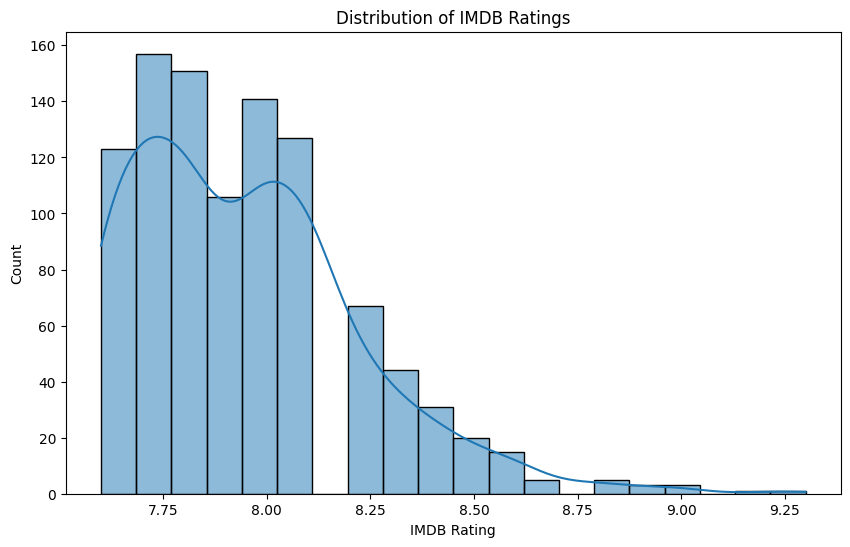

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.show()

C:\Users\dures\AppData\Local\Temp\ipykernel_7904\472487664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


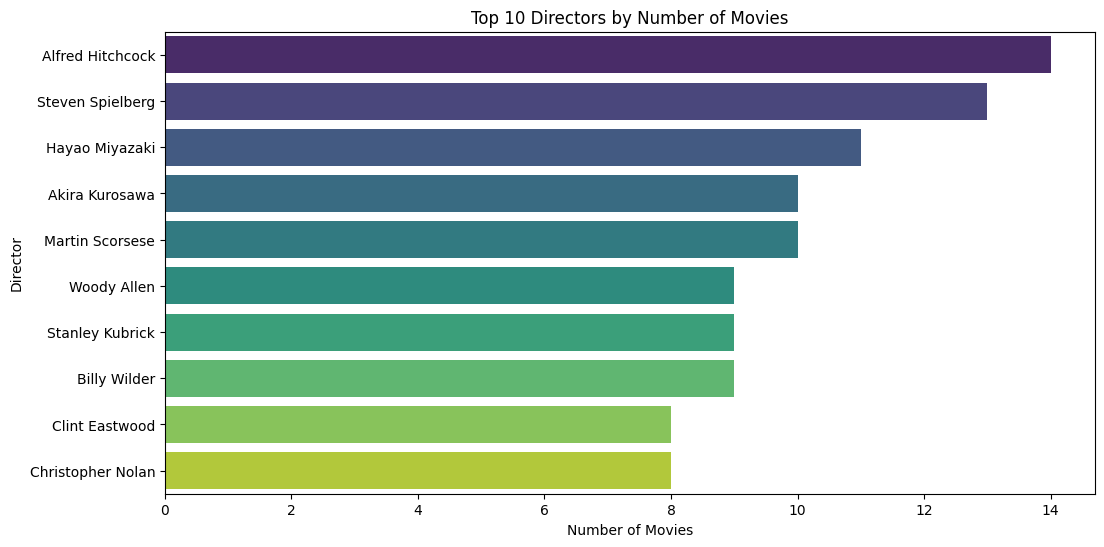

In [6]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

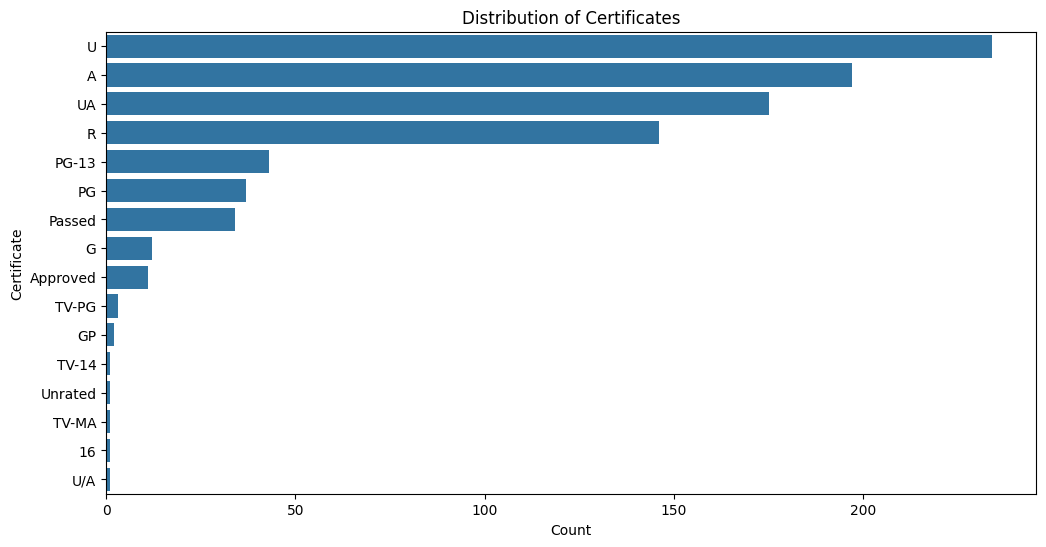

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Certificate', data=df, order=df['Certificate'].value_counts().index)
plt.title('Distribution of Certificates')
plt.xlabel('Count')
plt.ylabel('Certificate')
plt.show()

C:\Users\dures\AppData\Local\Temp\ipykernel_7904\2454516023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')


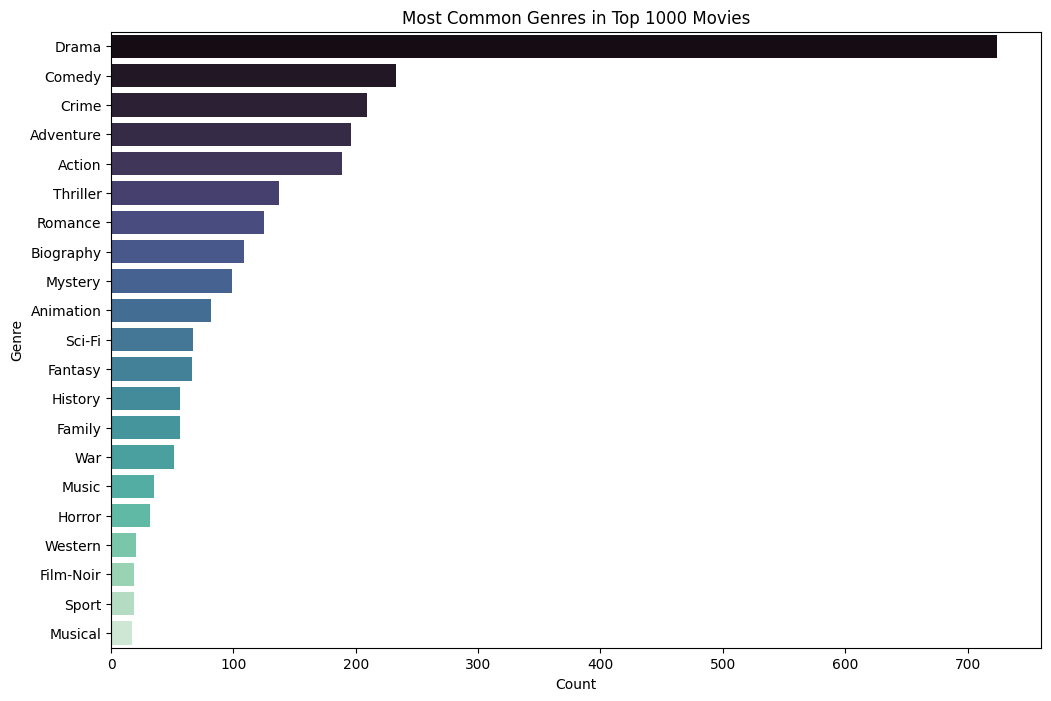

In [8]:
# Split genres (since some movies have multiple genres)
genres = df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Most Common Genres in Top 1000 Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dures\AppData\Local\Temp\ipykernel_7904\2156948808.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Runtime_min'] = df['Runtime'].str.extract('(\d+)').astype(float)


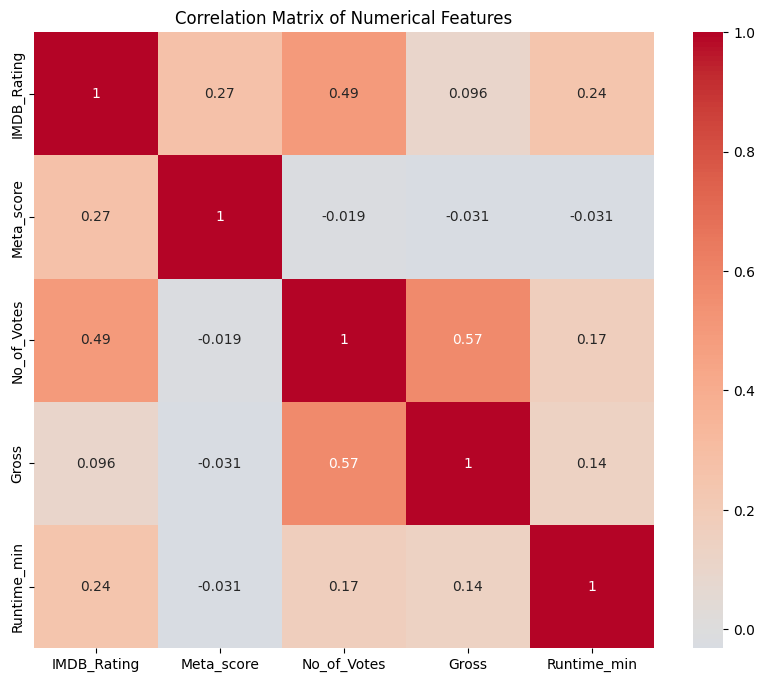

In [10]:
# First, create the Runtime_min column by extracting numbers from Runtime
df['Runtime_min'] = df['Runtime'].str.extract('(\d+)').astype(float)

# Also, clean the Gross column (remove commas and convert to float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Now select numerical columns for correlation
numerical_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_min']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

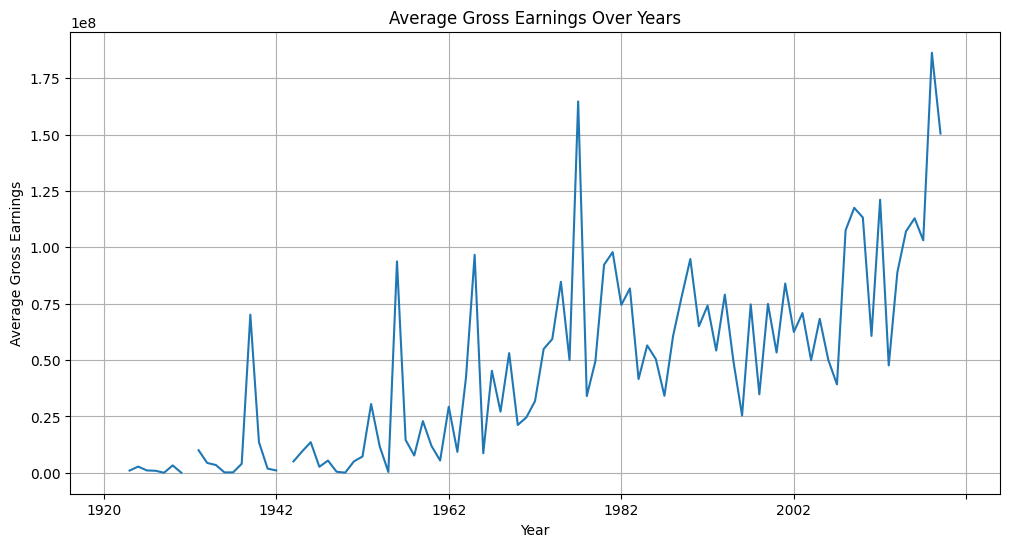

In [12]:
def clean_gross(value):
    if pd.isna(value):
        return np.nan
    try:
        if isinstance(value, str):
            return float(value.replace(',', '').replace('$', ''))
        return float(value)
    except:
        return np.nan

df['Gross_clean'] = df['Gross'].apply(clean_gross)

# Now proceed with the analysis
gross_by_year = df.groupby('Released_Year')['Gross_clean'].mean()

plt.figure(figsize=(12, 6))
gross_by_year.plot()
plt.title('Average Gross Earnings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Earnings')
plt.grid(True)
plt.show()

C:\Users\dures\AppData\Local\Temp\ipykernel_7904\168162836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stars.values, y=top_stars.index, palette='rocket')


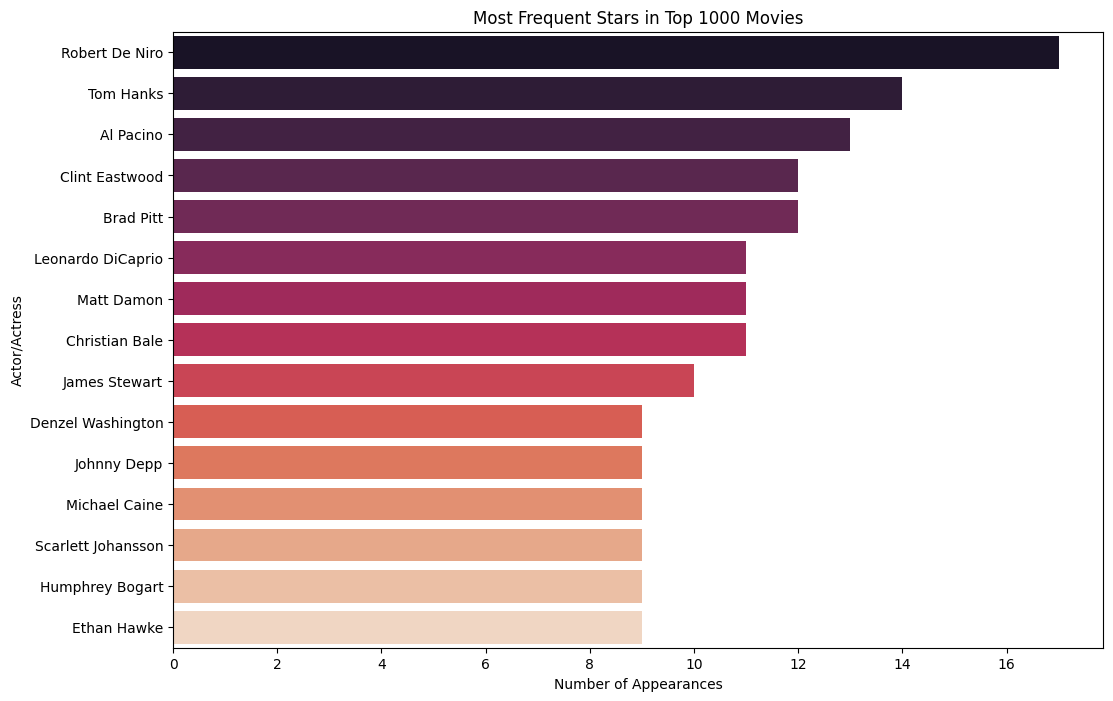

In [13]:
# Combine all star columns to find most frequent stars
stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
top_stars = stars.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_stars.values, y=top_stars.index, palette='rocket')
plt.title('Most Frequent Stars in Top 1000 Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Actress')
plt.show()

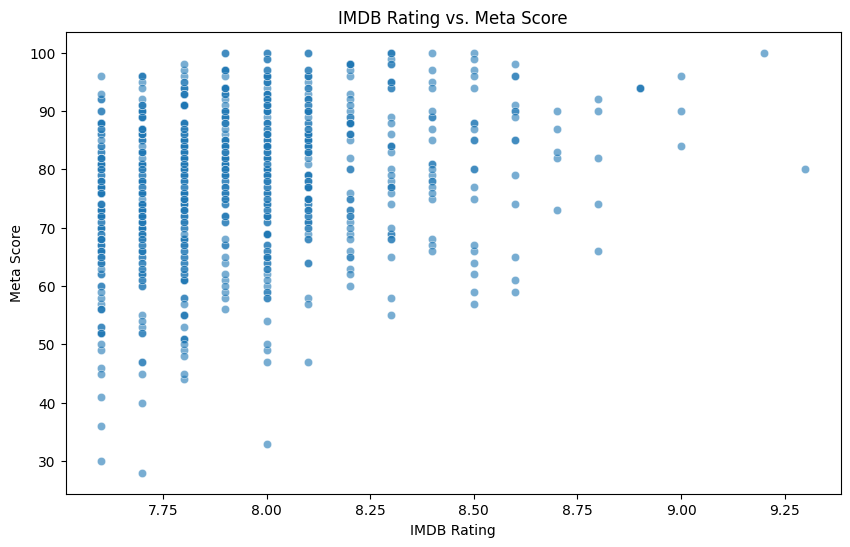

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df, alpha=0.6)
plt.title('IMDB Rating vs. Meta Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.show()

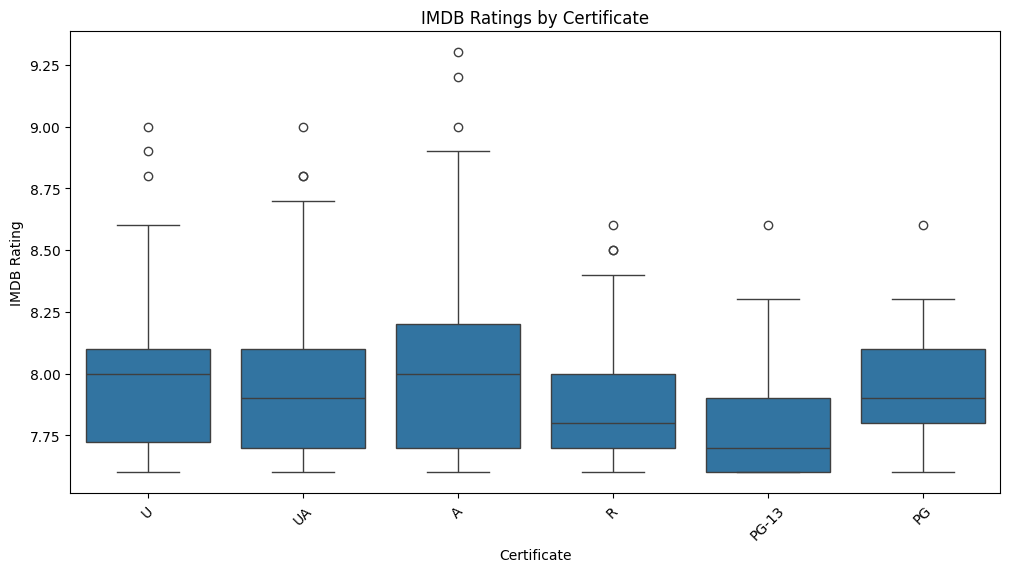

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, 
            order=['U', 'UA', 'A', 'R', 'PG-13', 'PG'])
plt.title('IMDB Ratings by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
plt.show()

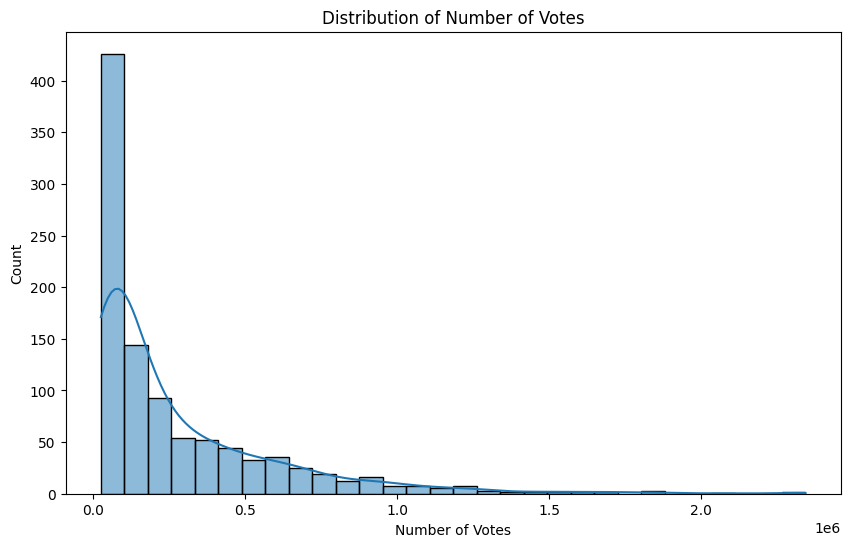

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['No_of_Votes'], bins=30, kde=True)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

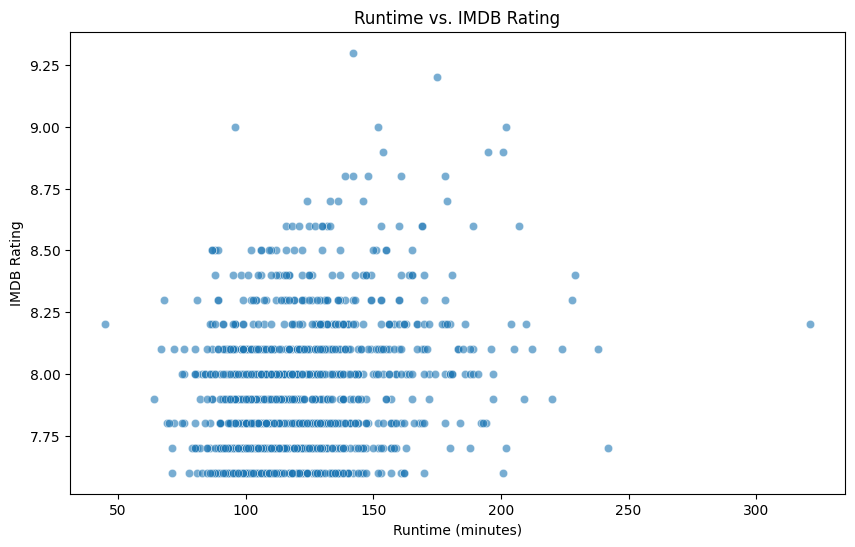

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime_min', y='IMDB_Rating', data=df, alpha=0.6)
plt.title('Runtime vs. IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

### Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Create a copy of the dataframe for ML
ml_df = df.copy()

# Feature engineering - handle Gross column properly
def clean_gross(value):
    if pd.isna(value):
        return np.nan
    try:
        # If it's already a number, return as float
        if isinstance(value, (int, float)):
            return float(value)
        # If it's a string, clean it
        if isinstance(value, str):
            cleaned = value.replace(',', '').replace('$', '').strip()
            return float(cleaned) if cleaned else np.nan
        return float(value)
    except (ValueError, TypeError):
        return np.nan

ml_df['Gross_clean'] = ml_df['Gross'].apply(clean_gross)

# Extract runtime minutes (handle both "142 min" format and numeric values)
def extract_runtime(value):
    if pd.isna(value):
        return np.nan
    try:
        if isinstance(value, str):
            # Extract numbers from strings like "142 min"
            numbers = ''.join(filter(str.isdigit, value))
            return float(numbers) if numbers else np.nan
        return float(value)
    except (ValueError, TypeError):
        return np.nan

ml_df['Runtime_min'] = ml_df['Runtime'].apply(extract_runtime)

# For simplicity, let's predict IMDB Rating based on other features
# Drop unnecessary columns
ml_df = ml_df.drop(['Poster_Link', 'Series_Title', 'Overview', 'Gross', 'Runtime'], axis=1)

# Handle missing values
ml_df['Meta_score'] = ml_df['Meta_score'].fillna(ml_df['Meta_score'].median())
ml_df['Gross_clean'] = ml_df['Gross_clean'].fillna(ml_df['Gross_clean'].median())
ml_df['Runtime_min'] = ml_df['Runtime_min'].fillna(ml_df['Runtime_min'].median())

# Define features and target
X = ml_df.drop('IMDB_Rating', axis=1)
y = ml_df['IMDB_Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical columns
numeric_features = ['Released_Year', 'Meta_score', 'No_of_Votes', 'Gross_clean', 'Runtime_min']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_features = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Machine Learning

RMSE: 0.1842
R2 Score: 0.4706


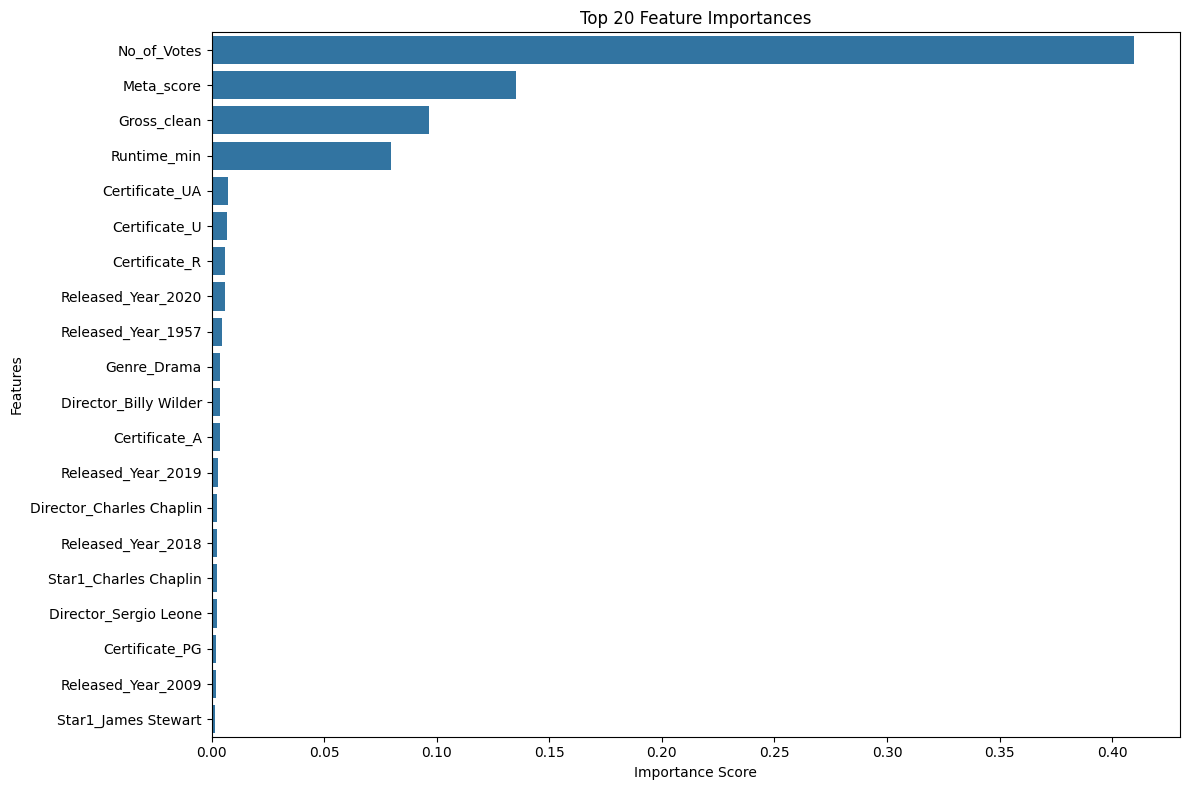

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature categorization
categorical_features = ['Released_Year', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
numeric_features = ['Meta_score', 'No_of_Votes', 'Gross_clean', 'Runtime_min']

# Handle missing values
for col in numeric_features:
    ml_df[col] = ml_df[col].fillna(ml_df[col].mean())
for col in categorical_features:
    ml_df[col] = ml_df[col].fillna('missing')

# Split data
X = ml_df.drop('IMDB_Rating', axis=1)
y = ml_df['IMDB_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')

# Feature importance visualization
rf = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']

# Get feature names - CORRECTED the key name here
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']  # Changed from 'onehotencoder' to 'onehot'
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Get importances and plot top 20
importances = rf.feature_importances_
sorted_idx = importances.argsort()[::-1][:20]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[sorted_idx], y=all_features[sorted_idx])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()